# Before You Apply: A look into a personal field of interest

The purpose of this project is to familiarize myself with pandas, numpy, and matplotlib. The data used comes from a Kaggle dataset, and is accessible via Kaggle using the link provided in the next cell. 

In [31]:
# imports
import opendatasets as od, pandas as pd, matplotlib.pyplot as plt

# getting the data
od.download('https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv')

Skipping, found downloaded files in "./data-science-job-salaries" (use force=True to force download)


## Looking at the data

This dataset details the salaries of data science jobs over three years, from 2020 to 2022. There are nine variables, each with six-hundred seven observations. There are no missing values in the dataset. The columns are as follows:

    - work_year: the year.
    - experience_level: the employee's experience level, from entry level to executive.
    - employment_type: the type of employment, contract, freelance, full-time, or part-time.
    - job_title: the employee's job title.
    - salary: the employee's salary
    - salary_currency: the type of currency, dollars, pounds, euros, etc.
    - salary_in_usd: the employee's salary in US dollars
    - employee_residence: the employee's country of residence
    - remote_ratio: the number of remote workers the company has
    - company_location: the country the company is located in
    - company_size: the size of the company  

In [32]:
# reading data into a DataFrame
dataset = pd.read_csv('data-science-job-salaries/ds_salaries.csv')

# taking a look at the .describe() method
dataset.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


Looking at the **salary_in_usd** column, we see that the average salary is about $112,300USD. 

In [33]:
# taking a look at the beginning of the DataFrame
dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [34]:
dataset.shape

(607, 12)

In [35]:
print(dataset.columns.tolist())

dataset.dtypes

['Unnamed: 0', 'work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']


Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

All of the categorical variables have been imported as objects. It may prove beneficial to us later to convert them to strings using **.astype()**, but we'll hold off on that for now.

In [36]:
# changing the values in a couple of columns
dataset['experience_level'] = dataset['experience_level'].replace({
    'MI': 'Mid', 
    'SE': 'Senior', 
    'EN': 'Entry',
    'EX': 'Executive'
})

dataset['company_size'] = dataset['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'
})

dataset.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,Mid,FT,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


<AxesSubplot:title={'center':'Top Five Jobs'}>

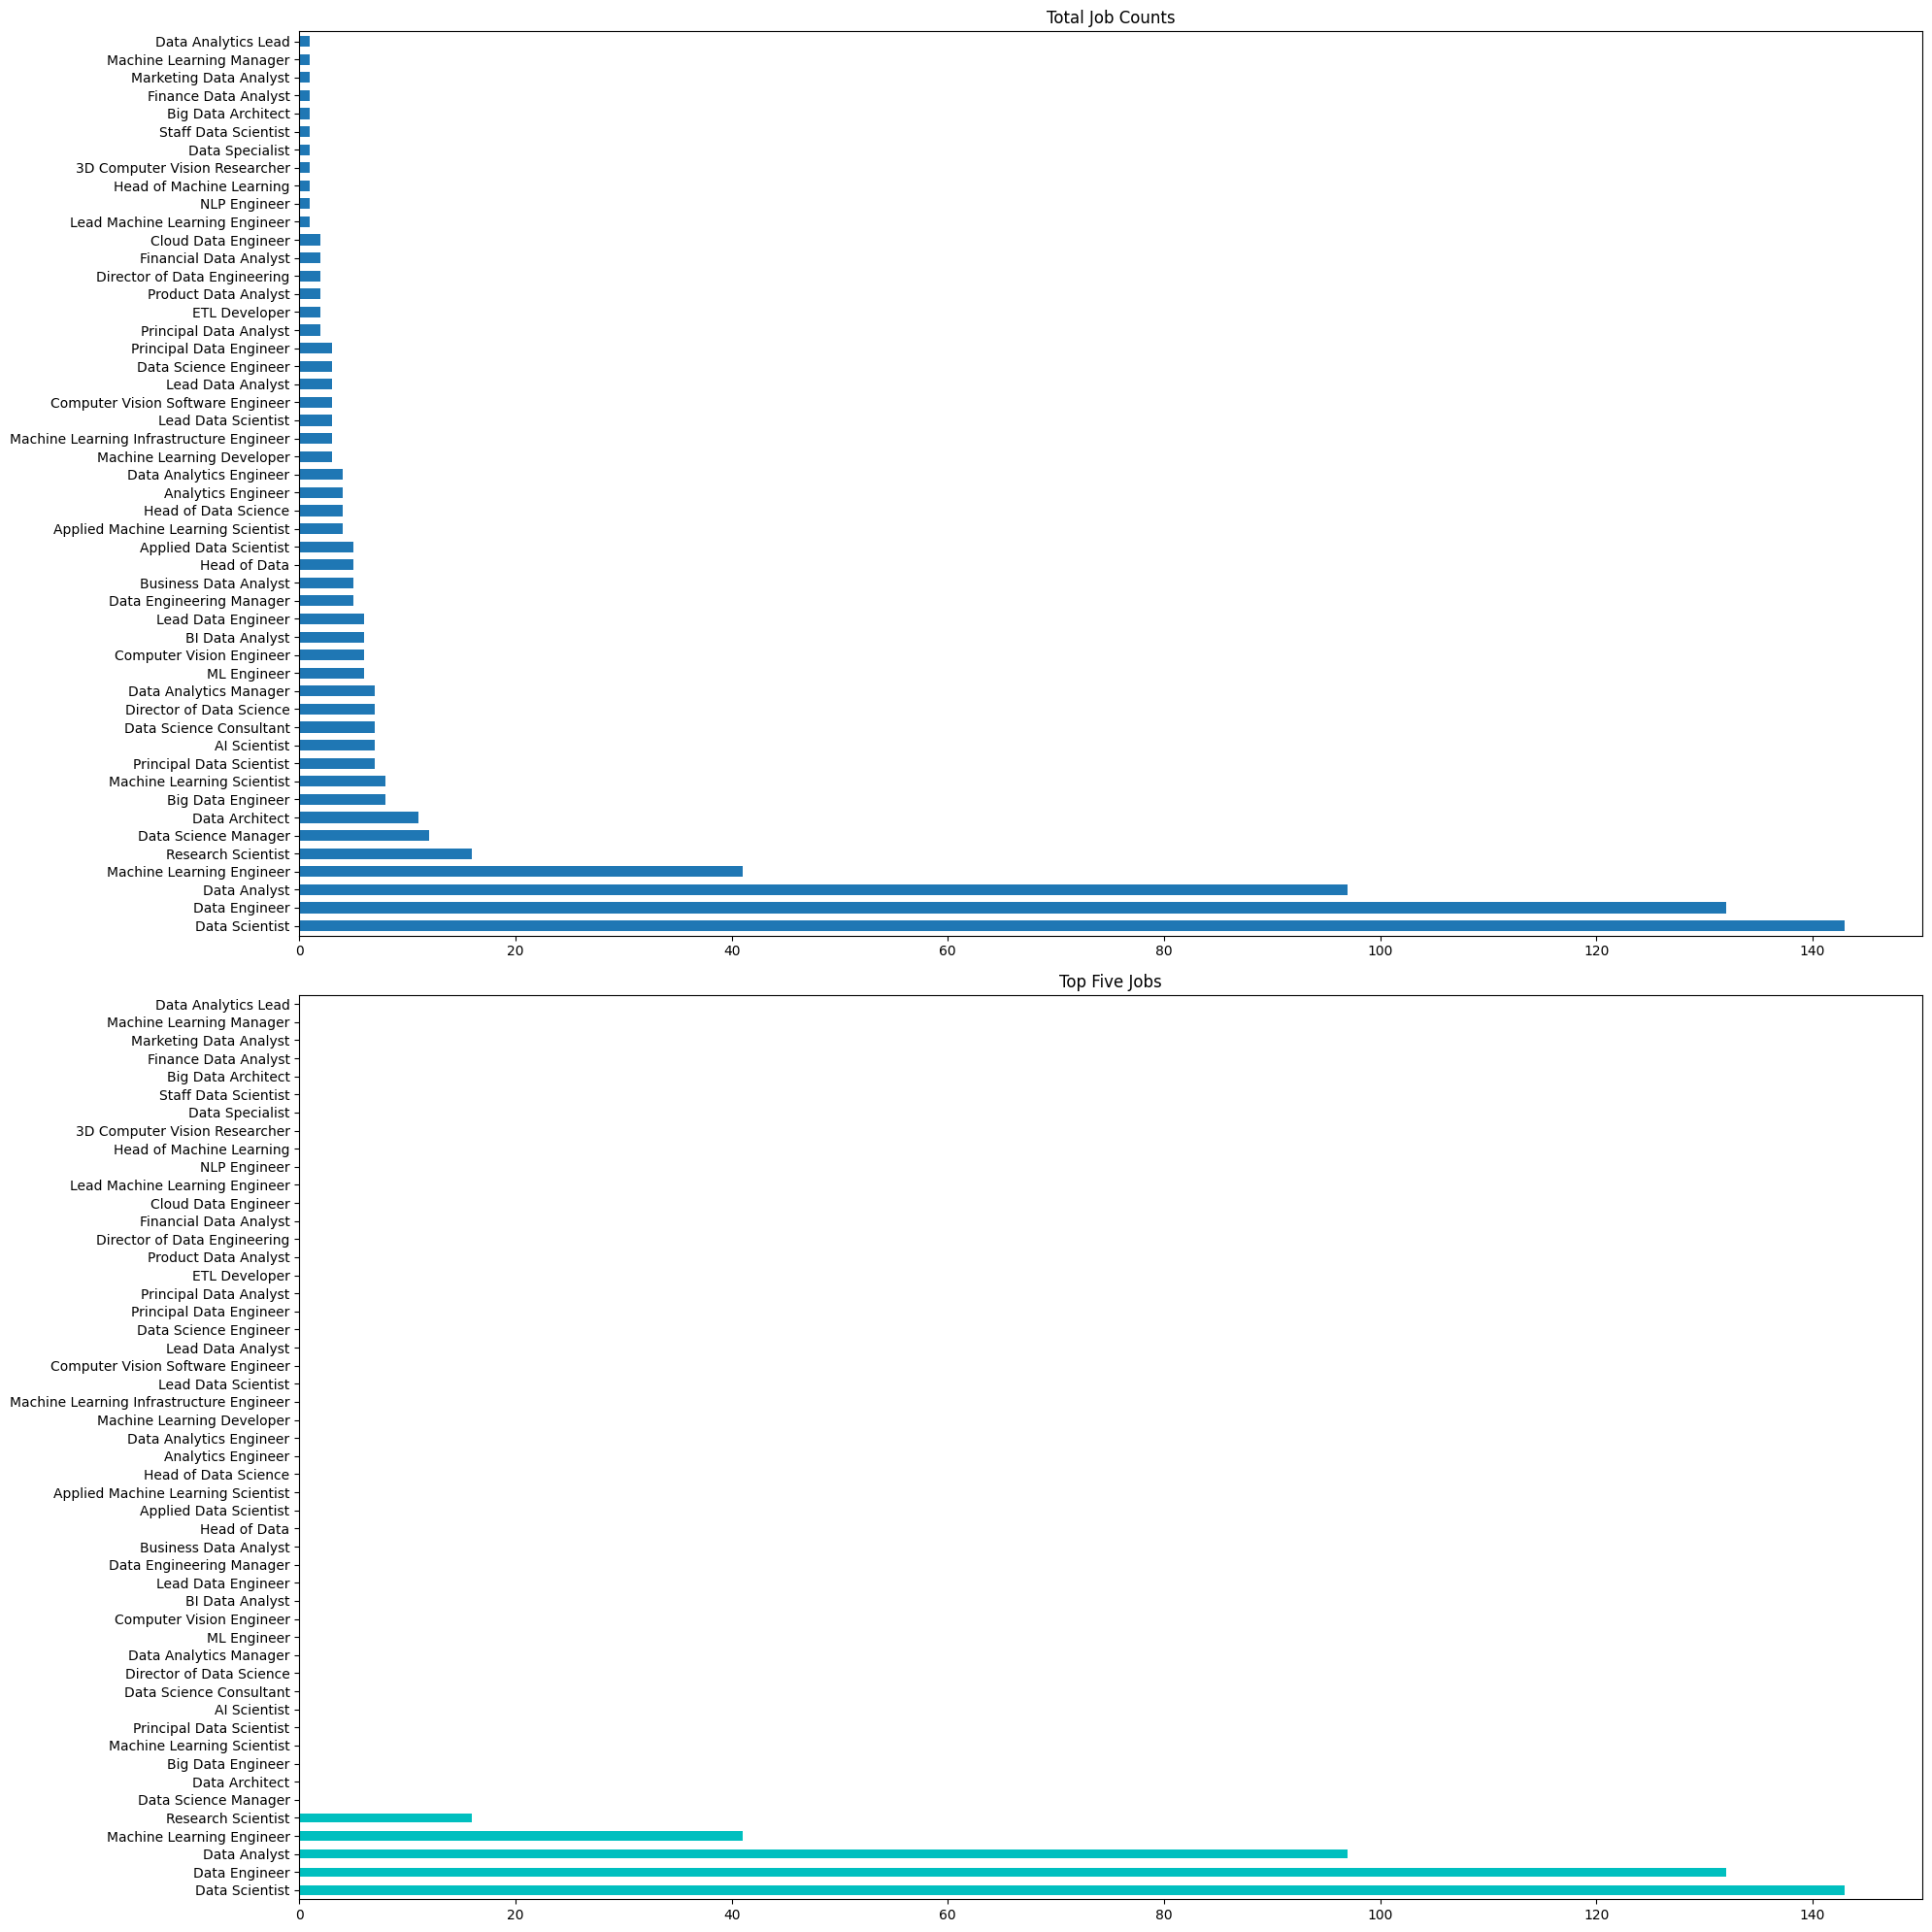

In [37]:
fig, ax = plt.subplots(2, 1, squeeze = False, layout = 'tight')

fig.set_figheight(20)
fig.set_figwidth(20)

job_counts = dataset['job_title'].value_counts()
job_counts.plot(kind = 'barh', width = 0.6, ax = ax[0, 0], title = 'Total Job Counts')

topfive = dataset['job_title'].value_counts().where(job_counts > 15)
topfive.plot(kind = 'barh', ax = ax[1, 0], color = 'c', title = 'Top Five Jobs')

In the first plot, we can see that there are three jobs that are far more common than the rest. This may be due to several things, the popularity of the job, the amount of experience required, the location, or the salary. It could also have something to do with company dynamics. What are the job duties for each position? What do the companies actually *do*? We're not made aware of these things (as they're not easy things to communicate via CSV file) and cannot make an educated guess, therefore. 

The second plot contains the five most common job titles, regardless of experience level. These values are interesting and allow us to see what jobs are more common. However, it might be worthwhile to see the experience level as it relates to the job title.

<AxesSubplot:title={'center':'Are Job Types Based on Experience Level?'}, xlabel='Experience Level', ylabel='Job Title'>

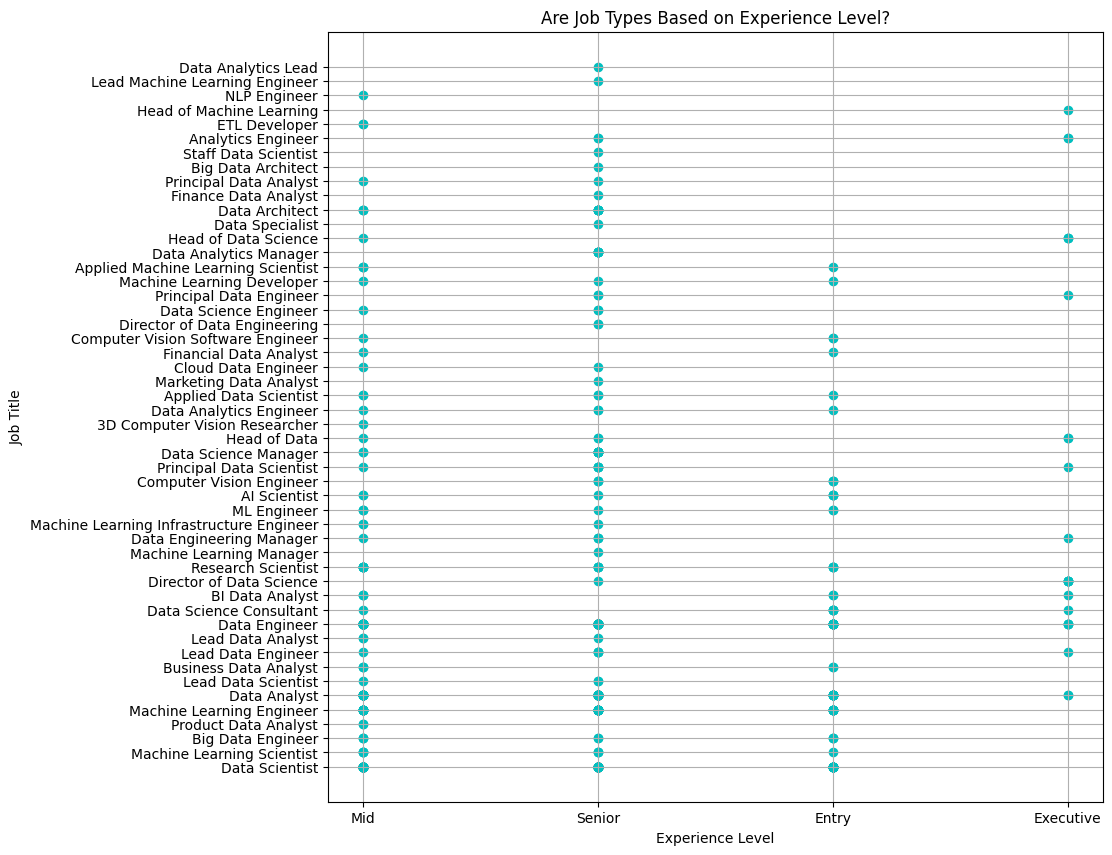

In [38]:
dataset.plot(
    x = 'experience_level', y = 'job_title', 
    s = 35, kind = 'scatter', 
    figsize = (10, 10), rot = 0, 
    ylabel = 'Job Title', xlabel = 'Experience Level', 
    grid = True, color = 'c', 
    title = 'Are Job Types Based on Experience Level?'
)

I am aware that this plot is *ugly*. I am apologizing to your eyes (and mine) as I write. However, I find this visualization to be somewhat informative. Using the gridlines, I can trace each position through each level of experience to see which jobs are more frequent at each level. I don't really need to know the count (which I could indicate by passing in a different, more specific size parameter), just the fact that some job titles are only held by people with a certain level of experience. Something like Plotly would allow me to demonstrate this interactively, but my focus for this notebook is learning pandas. 

Perhaps I'll add interactive visualizations at a later time. Mid- and senior-level employees are the most versatile, meaning that the number of employees at those levels working different jobs is greater than the number of entry- and executive-level employees working different jobs. In short, they have more dots.

Again, I haven't told the plot to calculate the size of the dots based on the count. They're static right now. When I revisit this notebook, that will change.

<AxesSubplot:ylabel='Company Size'>

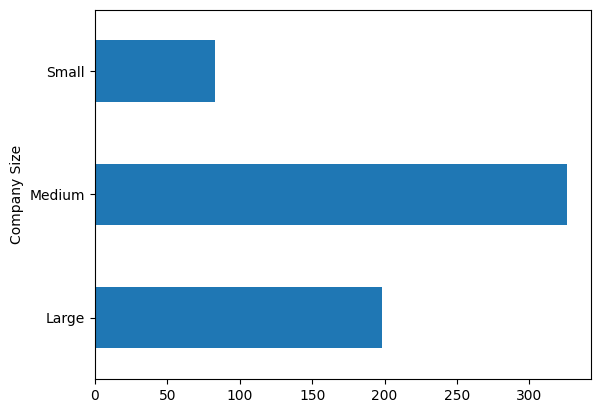

In [39]:
companysizedist = dataset.groupby('company_size')['company_size'].count()
companysizedist.plot(kind = 'barh', xlabel = 'Company Size')

The majority of companies are of medium size.

(array([149., 228., 149.,  61.,  10.,   2.,   4.,   3.,   0.,   1.]),
 array([  2859. ,  62573.1, 122287.2, 182001.3, 241715.4, 301429.5,
        361143.6, 420857.7, 480571.8, 540285.9, 600000. ]),
 <BarContainer object of 10 artists>)

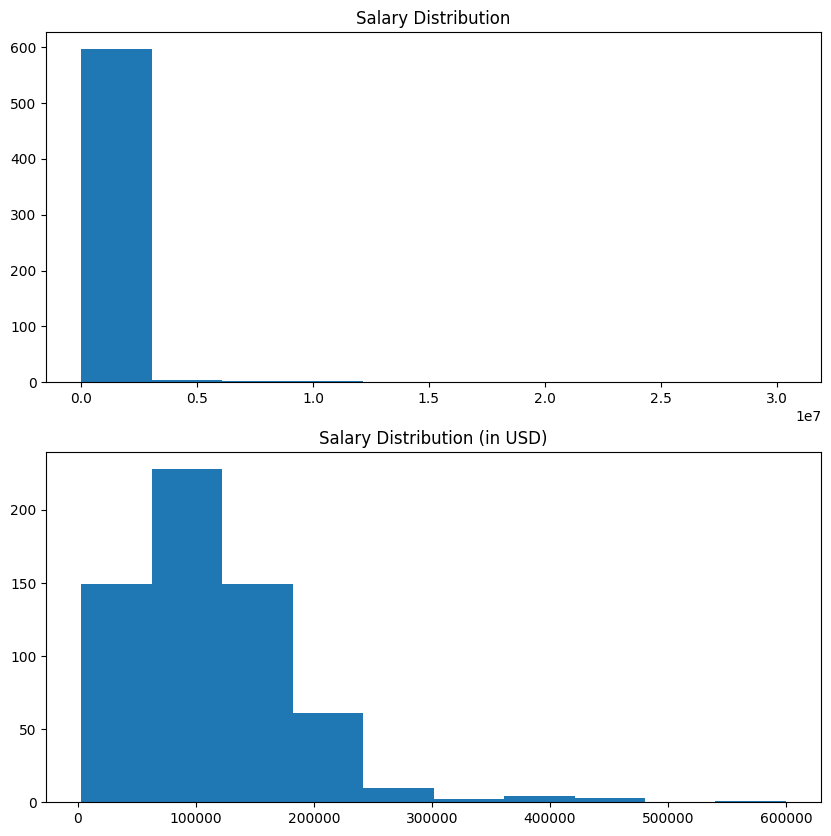

In [56]:
fig, (ax2, ax3) = plt.subplots(2, 1)

fig.set_figheight(10)
fig.set_figwidth(10)

ax2.set_title('Salary Distribution')
ax3.set_title('Salary Distribution (in USD)')

ax2.hist(dataset['salary'])
ax3.hist(dataset['salary_in_usd'])

By both regular and converted measurements of salary, more people are making less money. Now, we'll take a closer look at salary against other features of the dataset.

<AxesSubplot:title={'center':'Max Salary by Experience Level (in US Dollars)'}, xlabel='Experience Level', ylabel='Salary'>

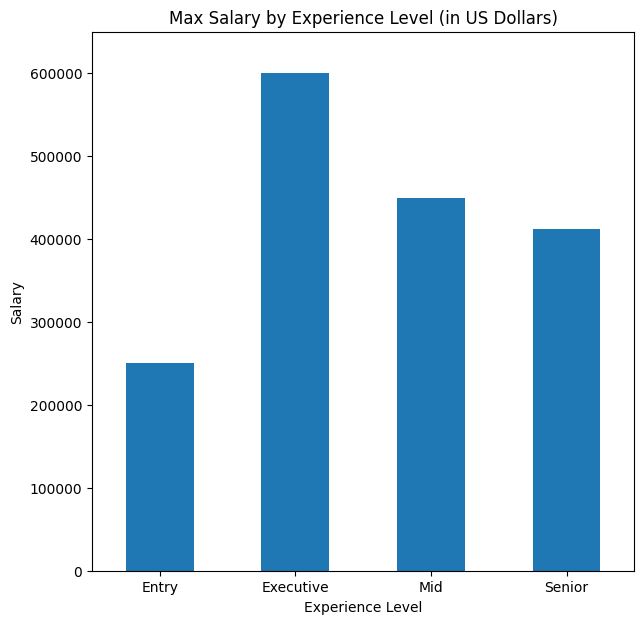

In [40]:
exp_levels = dataset.groupby('experience_level')['salary_in_usd'].max()
exp_levels.plot(
    kind = 'bar',
    title = 'Max Salary by Experience Level (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Experience Level',
    figsize = (7, 7), ylim = (0, 650_000), rot = 0
)

<AxesSubplot:title={'center':'Average Salary by Experience Level (in US Dollars)'}, ylabel='Experience Level'>

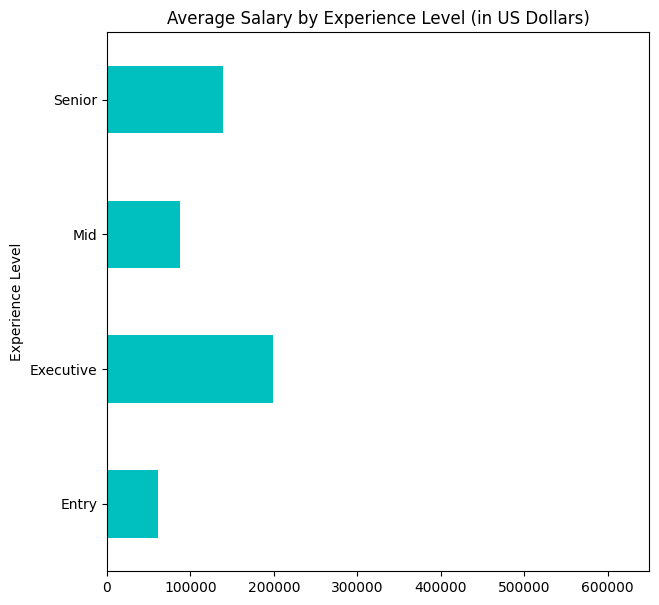

In [41]:
exp_levels = dataset.groupby('experience_level')['salary_in_usd'].mean()
exp_levels.plot(
    kind = 'barh', title = 'Average Salary by Experience Level (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Experience Level',
    figsize = (7, 7), xlim = (0, 650_000), rot = 0, color = 'c'
)

In [42]:
# rename values in employment type column, here:
dataset['employment_type'] = dataset['employment_type'].replace({
    'CT': 'Contract',
    'FT': 'Full-time',
    'PT': 'Part-time',
    'FL': 'Freelance'
})

dataset['employment_type']

0      Full-time
1      Full-time
2      Full-time
3      Full-time
4      Full-time
         ...    
602    Full-time
603    Full-time
604    Full-time
605    Full-time
606    Full-time
Name: employment_type, Length: 607, dtype: object

<AxesSubplot:title={'center':'Max Salary by Employee Type (in US Dollars)'}, xlabel='Employment Type', ylabel='Salary'>

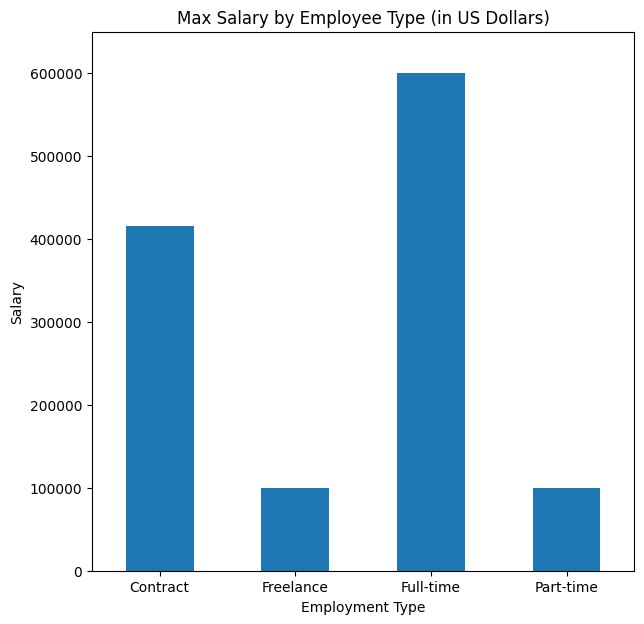

In [43]:
emp_types = dataset.groupby('employment_type')['salary_in_usd'].max()
emp_types.plot(
    kind = 'bar', title = 'Max Salary by Employee Type (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Employment Type',
    figsize = (7, 7), ylim = (0, 650_000), rot = 0
)

<AxesSubplot:title={'center':'Average Salary by Employee Type (in US Dollars)'}, xlabel='Employment Type', ylabel='Salary'>

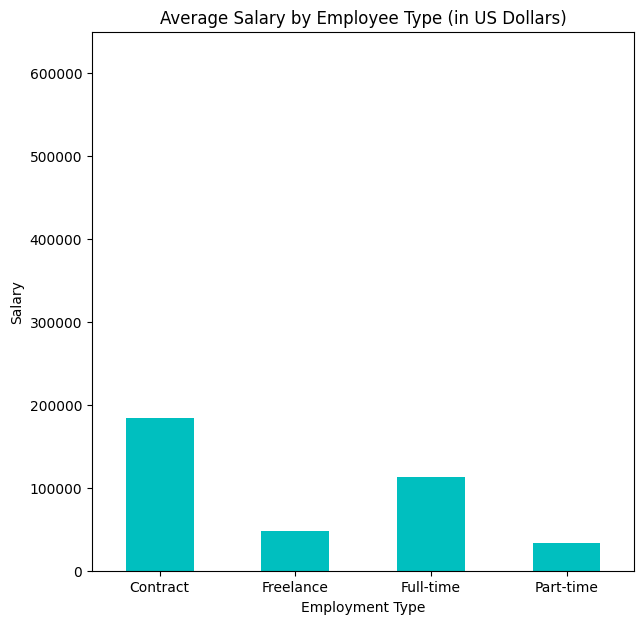

In [44]:
emp_types = dataset.groupby('employment_type')['salary_in_usd'].mean()
emp_types.plot(
    kind = 'bar', title = 'Average Salary by Employee Type (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Employment Type',
    figsize = (7, 7), ylim = (0, 650_000), rot = 0, color = 'c'
)

These two plots indicate, again, that more people are making *less* money. Contract workers make the most on average, followed by full-time employees, freelancers, and part-time workers. 

<AxesSubplot:title={'center':'Max Salary by Job Title (in US Dollars)'}, ylabel='Job Title'>

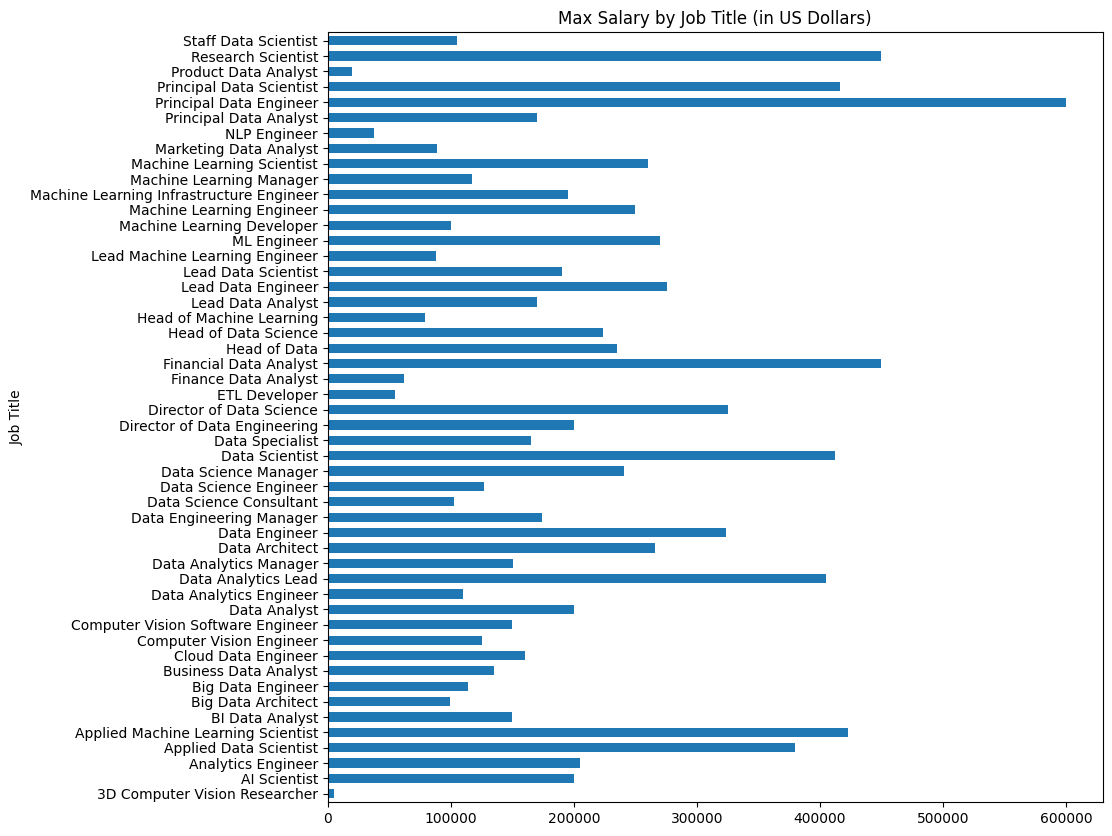

In [45]:
job_titles = dataset.groupby('job_title')['salary_in_usd'].max()
job_titles.plot(
    kind = 'barh', width = 0.6, title = 'Max Salary by Job Title (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Job Title',
    figsize = (10, 10), ylim = (0, 600_000)
)

<AxesSubplot:title={'center':'Average Salary by Job Title (in US Dollars)'}, ylabel='Job Title'>

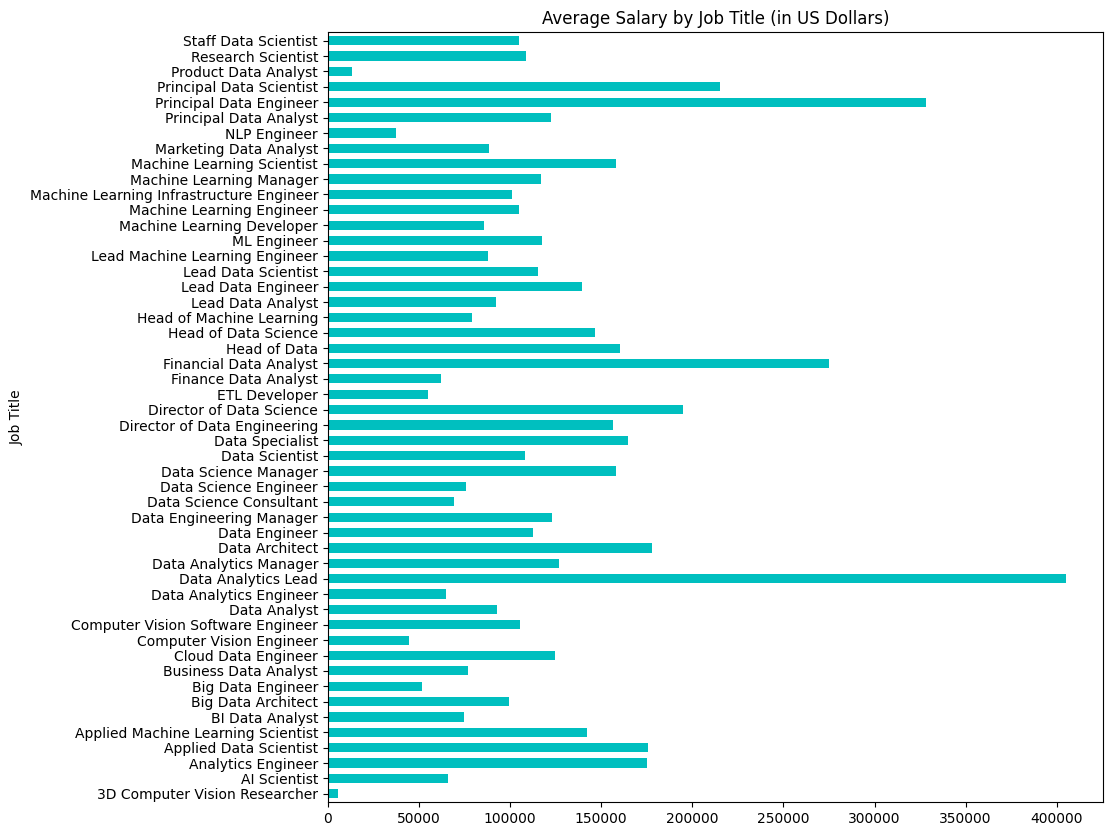

In [46]:
job_titles = dataset.groupby('job_title')['salary_in_usd'].mean()
job_titles.plot(
    kind = 'barh', width = 0.6, title = 'Average Salary by Job Title (in US Dollars)',
    ylabel = 'Salary', xlabel = 'Job Title',
    figsize = (10, 10), ylim = (0, 600_000), color = 'c'
)

<AxesSubplot:title={'center':'Max Salary by Employee Residence'}, xlabel='Employee Country of Residence', ylabel='Annual Salary (in USD)'>

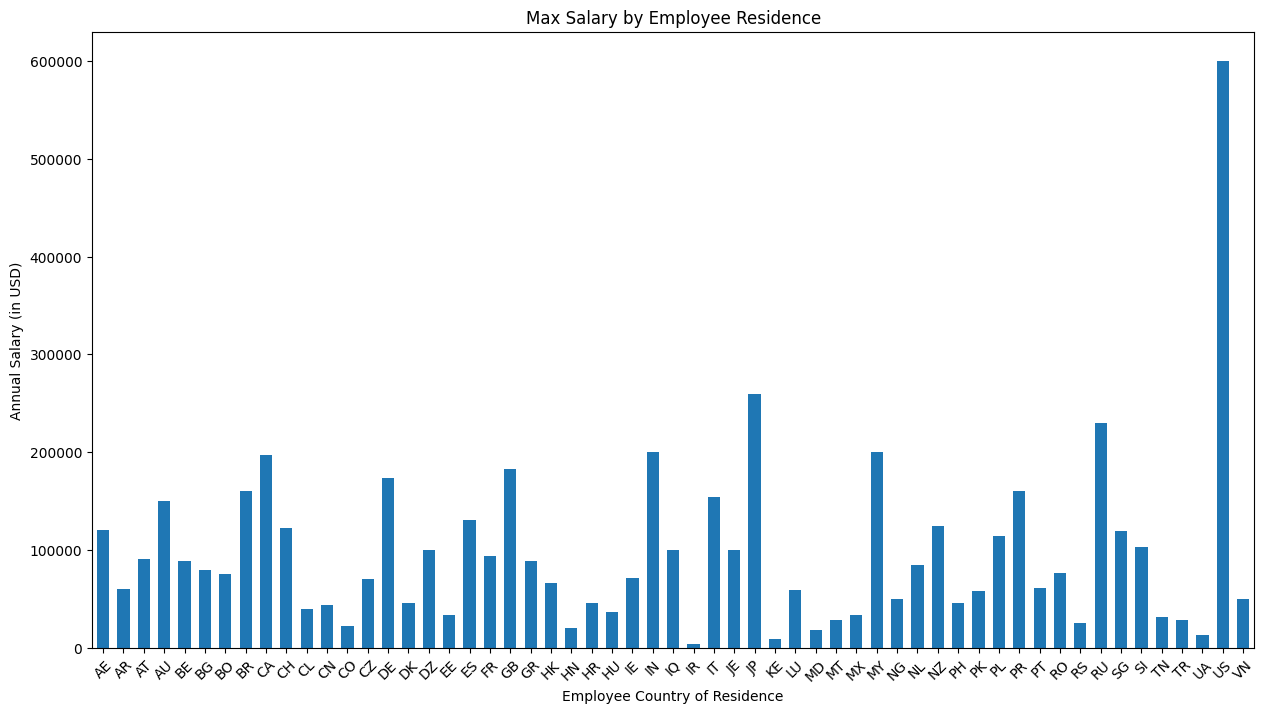

In [47]:
salarybylocation = dataset.groupby('employee_residence')['salary_in_usd'].max()
salarybylocation.plot(kind = 'bar', width = 0.6, title = 'Max Salary by Employee Residence', 
                      figsize = (15, 8), rot = 45,
                      xlabel = 'Employee Country of Residence', ylabel = 'Annual Salary (in USD)')

<AxesSubplot:title={'center':'Average Salary by Employee Residence'}, xlabel='Employee Country of Residence', ylabel='Salary (in USD)'>

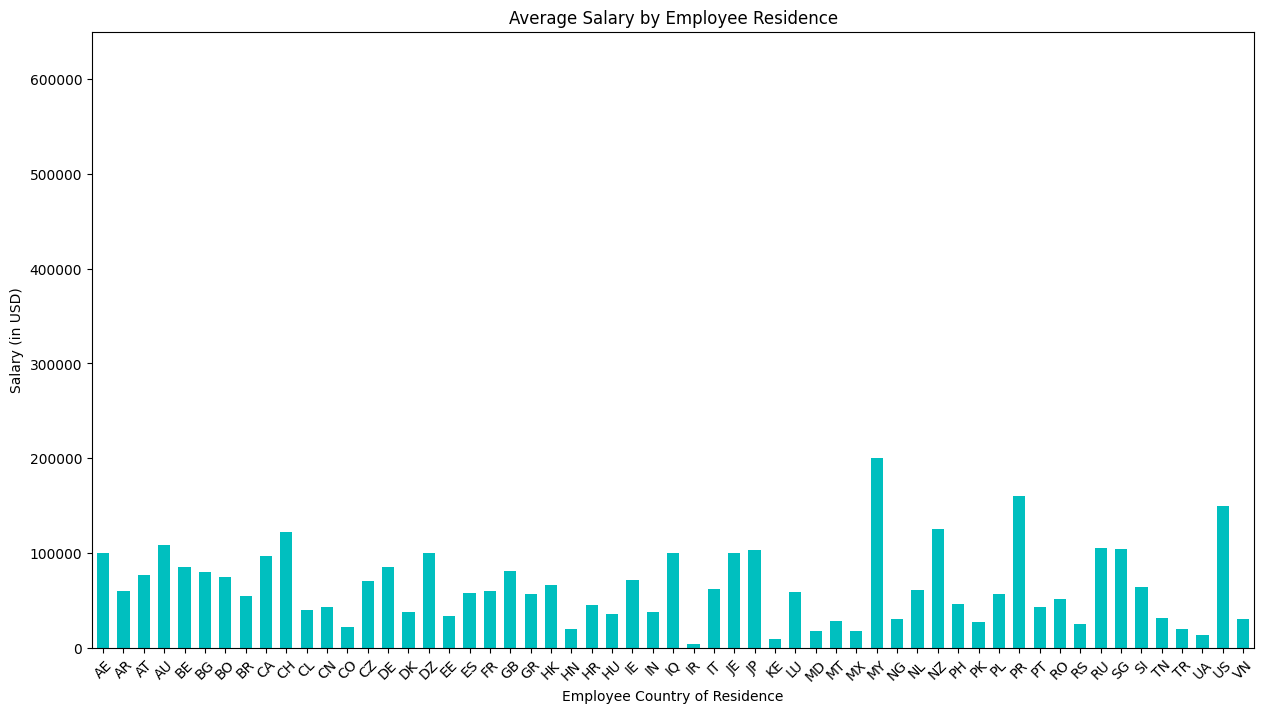

In [48]:
# add average salary by reference, here:
mean_salarybylocation = dataset.groupby('employee_residence')['salary_in_usd'].mean()
mean_salarybylocation.plot(kind = 'bar', width = 0.6, title = 'Average Salary by Employee Residence', 
                      figsize = (15, 8), rot = 45, color = 'c', ylim = (0, 650_000),
                      xlabel = 'Employee Country of Residence', ylabel = 'Salary (in USD)')

In [50]:
dataset['salary_in_usd'].max()

600000

In [51]:
paycorrall = dataset['salary'].mean()
paycorrusd = dataset['salary_in_usd'].mean()

print(f'The average overall salary is: ${paycorrall:.2f}')
print(f'The average salary in USD is ${paycorrusd:.2f}')

The average overall salary is: $324000.06
The average salary in USD is $112297.87


<AxesSubplot:ylabel='Company Size, Ratio'>

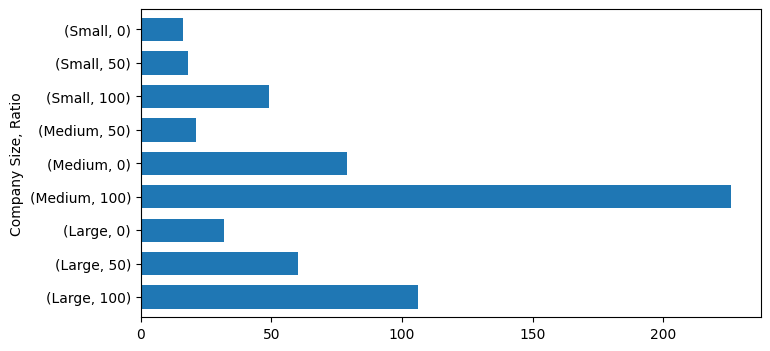

In [52]:
ratiobysize = dataset.groupby('company_size')['remote_ratio'].value_counts()
ratiobysize.plot(kind = 'barh', width = 0.7, figsize = (8, 4),
                 xlabel = 'Company Size, Ratio') 

Here, we see that medium companies are not only the most common, but that they also have the most remote employees. There could be several reasons for this.

<AxesSubplot:>

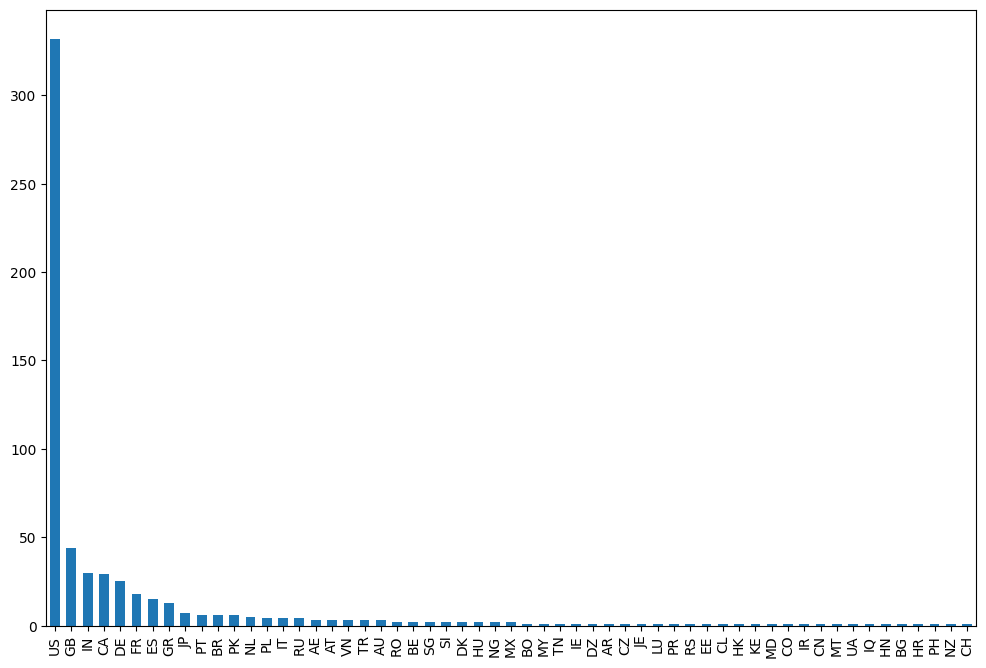

In [65]:
residence_location = dataset['employee_residence'].value_counts()
residence_location.plot(
    kind = 'bar',
    figsize = (12, 8),
    width = 0.6
)

<AxesSubplot:>

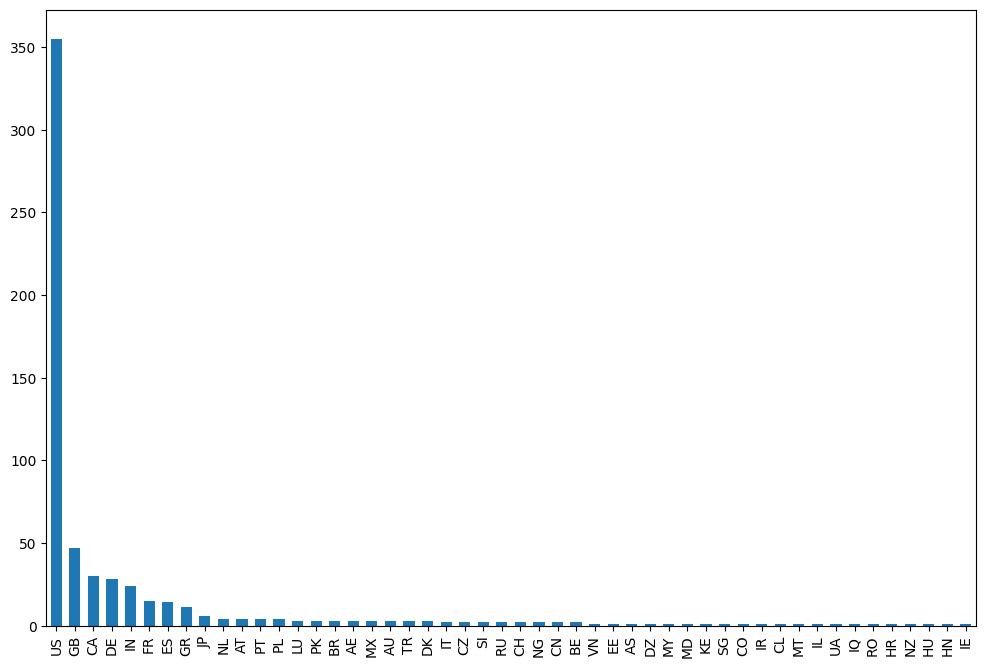

In [63]:
company_location = dataset['company_location'].value_counts()
company_location.plot(
    kind = 'bar',
    figsize = (12, 8),
    width = 0.6
)

<AxesSubplot:xlabel='Employee Residence', ylabel='Company Location'>

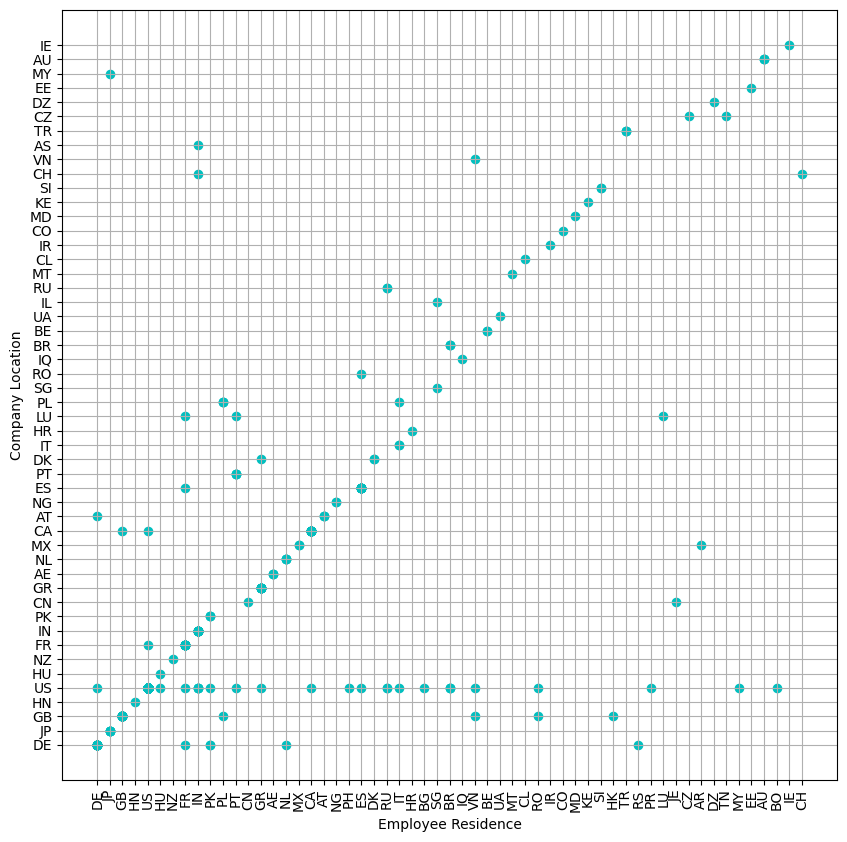

In [78]:
dataset.plot(
    x = 'employee_residence', xlabel = 'Employee Residence',
    y = 'company_location', ylabel = 'Company Location',
    kind = 'scatter',
    figsize = (10, 10), rot = 90,
    color = 'c', s = 35,
    grid = True,
)

In [53]:
residence_location_diff = dataset.where(dataset['employee_residence'] == dataset['company_location'])
residence_location_diff.dropna()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0.0,2020.0,Mid,Full-time,Data Scientist,70000.0,EUR,79833.0,DE,0.0,DE,Large
1,1.0,2020.0,Senior,Full-time,Machine Learning Scientist,260000.0,USD,260000.0,JP,0.0,JP,Small
2,2.0,2020.0,Senior,Full-time,Big Data Engineer,85000.0,GBP,109024.0,GB,50.0,GB,Medium
3,3.0,2020.0,Mid,Full-time,Product Data Analyst,20000.0,USD,20000.0,HN,0.0,HN,Small
4,4.0,2020.0,Senior,Full-time,Machine Learning Engineer,150000.0,USD,150000.0,US,50.0,US,Large
...,...,...,...,...,...,...,...,...,...,...,...,...
601,601.0,2022.0,Entry,Full-time,Data Analyst,52000.0,USD,52000.0,CA,0.0,CA,Medium
602,602.0,2022.0,Senior,Full-time,Data Engineer,154000.0,USD,154000.0,US,100.0,US,Medium
603,603.0,2022.0,Senior,Full-time,Data Engineer,126000.0,USD,126000.0,US,100.0,US,Medium
604,604.0,2022.0,Senior,Full-time,Data Analyst,129000.0,USD,129000.0,US,0.0,US,Medium


This gives us another representation of the plot we visualized above. 

## Wrap-up

We've got a pretty good idea of what the job market looks like now. This dataset is wonderful! To enhance our analysis, however, we'll need some additional data. It would be helpful to know how many jobs were available in each of the recorded years, as well as the education level and number of years of previous experience the employees had prior to entering their roles. There may be other datasets out there containing this or other similar information. Should I find any, I will revisit this notebook.

Thanks for analyzing this data with me!